In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
region = df['Region']
features = df.drop(['Region'], axis=1)
features.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [4]:
features = features.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed

array([[2.0000e+00, 1.2669e+04, 9.6560e+03, ..., 2.1400e+02, 2.6740e+03,
        1.3380e+03],
       [2.0000e+00, 7.0570e+03, 9.8100e+03, ..., 1.7620e+03, 3.2930e+03,
        1.7760e+03],
       [2.0000e+00, 6.3530e+03, 8.8080e+03, ..., 2.4050e+03, 3.5160e+03,
        7.8440e+03],
       ...,
       [2.0000e+00, 1.4531e+04, 1.5488e+04, ..., 4.3700e+02, 1.4841e+04,
        1.8670e+03],
       [1.0000e+00, 1.0290e+04, 1.9810e+03, ..., 1.0380e+03, 1.6800e+02,
        2.1250e+03],
       [1.0000e+00, 2.7870e+03, 1.6980e+03, ..., 6.5000e+01, 4.7700e+02,
        5.2000e+01]])

In [5]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [6]:
cov_matrix = np.cov(features_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [7]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [8]:
manual_pca_2d = features_scaled.dot(eigenvectors[:, :2])
manual_pca_3d = features_scaled.dot(eigenvectors[:, :3])


In [9]:
pca = PCA()
sklearn_pca_result = pca.fit_transform(features_scaled)
sklearn_pca_2d = sklearn_pca_result[:, :2]
sklearn_pca_3d = sklearn_pca_result[:, :3]

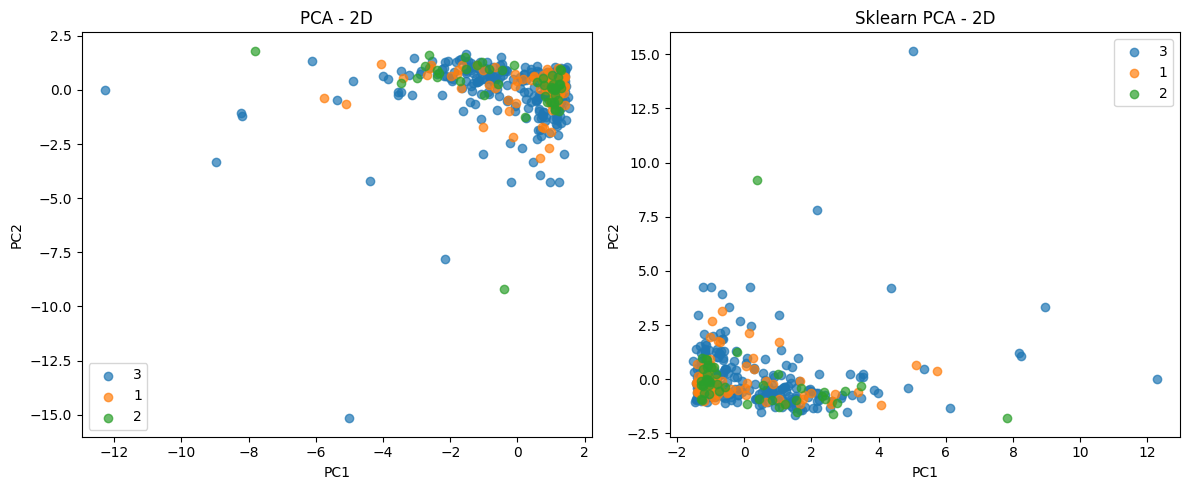

In [10]:
# Визуализация 2D
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for region_type in region.unique():
    mask = region == region_type
    plt.scatter(manual_pca_2d[mask, 0], manual_pca_2d[mask, 1],
                label=region_type, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2D')
plt.legend()

plt.subplot(1, 2, 2)
for region_type in region.unique():
    mask = region == region_type
    plt.scatter(sklearn_pca_2d[mask, 0], sklearn_pca_2d[mask, 1],
                label=region_type, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Sklearn PCA - 2D')
plt.legend()

plt.tight_layout()
plt.show()

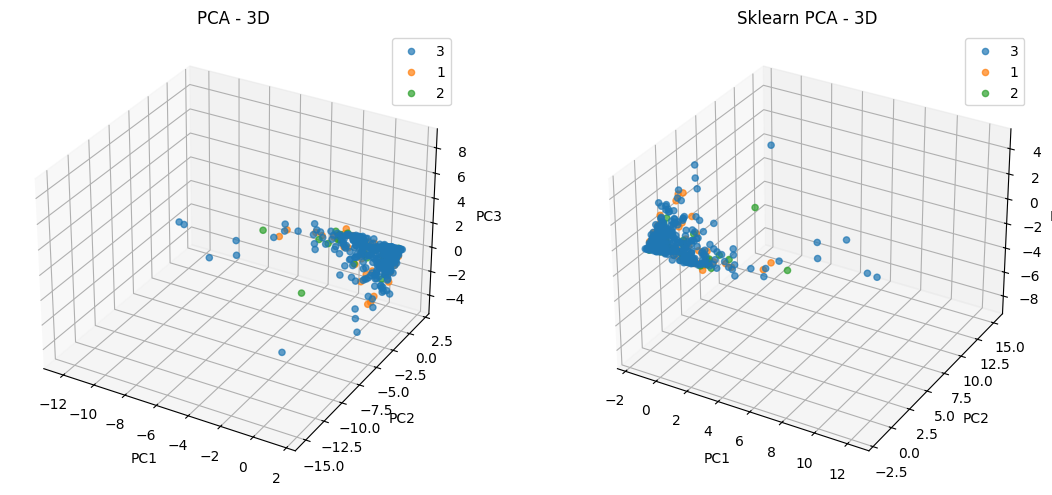

In [11]:
# Визуализация 3D
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for region_type in region.unique():
    mask = region == region_type
    ax1.scatter(manual_pca_3d[mask, 0], manual_pca_3d[mask, 1], manual_pca_3d[mask, 2],
                label=region_type, alpha=0.7)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PCA - 3D')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for region_type in region.unique():
    mask = region == region_type
    ax2.scatter(sklearn_pca_3d[mask, 0], sklearn_pca_3d[mask, 1], sklearn_pca_3d[mask, 2],
                label=region_type, alpha=0.7)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('Sklearn PCA - 3D')
ax2.legend()

plt.tight_layout()
plt.show()

In [12]:
total_variance_manual = np.sum(eigenvalues)
variance_2d_manual = np.sum(eigenvalues[:2])
variance_3d_manual = np.sum(eigenvalues[:3])

loss_2d_manual = (1 - variance_2d_manual / total_variance_manual) * 100
loss_3d_manual = (1 - variance_3d_manual / total_variance_manual) * 100

total_variance_sklearn = np.sum(pca.explained_variance_)
variance_2d_sklearn = np.sum(pca.explained_variance_[:2])
variance_3d_sklearn = np.sum(pca.explained_variance_[:3])

loss_2d_sklearn = (1 - variance_2d_sklearn / total_variance_sklearn) * 100
loss_3d_sklearn = (1 - variance_3d_sklearn / total_variance_sklearn) * 100

print("Потери информации при снижении размерности:")
print(f"PCA - 2D: {loss_2d_manual:.2f}%")
print(f"PCA - 3D: {loss_3d_manual:.2f}%")
print(f"Sklearn PCA - 2D: {loss_2d_sklearn:.2f}%")
print(f"Sklearn PCA - 3D: {loss_3d_sklearn:.2f}%")

Потери информации при снижении размерности:
PCA - 2D: 30.18%
PCA - 3D: 19.61%
Sklearn PCA - 2D: 30.18%
Sklearn PCA - 3D: 19.61%
